LinearRegression MSE: 0.176284
RandomForest MSE: 0.012955
MLP MSE: 0.201002
[0.         0.32551658 0.65103315 0.97654973 1.30206631 1.62758289
 1.95309946 2.27861604 2.60413262 2.9296492 ]


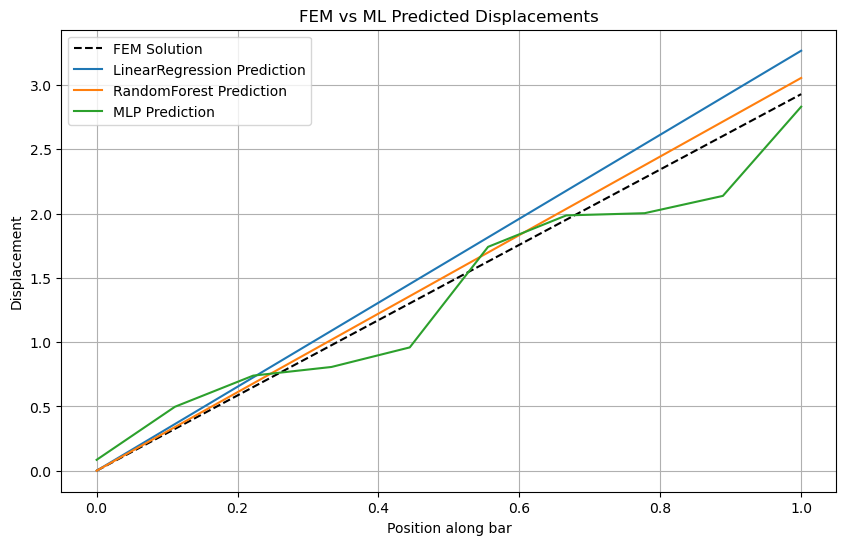

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# FEM solver code for a 1D bar fixed at one end
def fem_1d_bar(E, A, L, F, num_nodes):
    dx = L / (num_nodes - 1)
    K = np.zeros((num_nodes, num_nodes))  # Global Stiffness matrix
    f = np.zeros(num_nodes)               # Global force vector
 
    for i in range(num_nodes - 1):
        k = E * A / dx
        K[i, i] += k
        K[i, i + 1] -= k
        K[i + 1, i] -= k
        K[i + 1, i + 1] += k

    f[-1] = F  # Force at right end
    # Apply boundary condition: u[0] = 0 since one end is fixed
    K = K[1:, 1:]
    f = f[1:]
    u = np.linalg.solve(K, f)
    u = np.concatenate(([0], u))  # u[0] = 0
    return u

# Generating random dataset
samples = 300
num_nodes = 10
A = 1.0 # Area
L = 1.0 # Length of the bar

X_data = []
y_data = []

for _ in range(samples):
    E = np.random.uniform(100, 300)       # Young's modulus
    F = np.random.uniform(10, 1000)       # Force

    u = fem_1d_bar(E, A, L, F, num_nodes)
    X_data.append([E, F])
    y_data.append(u)

X_data = np.array(X_data)
y_data = np.array(y_data)

# Here implement the train/test split
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Different ML models to evaluate the data
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'MLP': MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=5000)
}

# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = (model, mse)
    print(f"{name} MSE: {mse:.6f}")

# Plot comparison for one test sample
sample_index = 5
E_test, F_test = X_test[sample_index]
true_u = fem_1d_bar(E_test, A, L, F_test, num_nodes)
print(true_u)

plt.figure(figsize=(10, 6))
x_coords = np.linspace(0, L, num_nodes)
plt.plot(x_coords, true_u, 'k--', label='FEM Solution')

for name, (model, _) in results.items():
    pred_u = model.predict([X_test[sample_index]])[0]
    plt.plot(x_coords, pred_u, label=f'{name} Prediction')

plt.xlabel('Position along bar')
plt.ylabel('Displacement')
plt.title('FEM vs ML Predicted Displacements')
plt.legend()
plt.grid(True)
plt.show()
